Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import networkx as nx
G = nx.MultiDiGraph()

Read CSV File 

In [4]:
my_dataset = pd.read_csv('airlinedelaycauses_DelayedFlights.csv',  low_memory=False)

Print Dataset

In [5]:
my_dataset

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


DATA PREPROCESSING

Column Removal

In [6]:
my_dataset = my_dataset.drop(['Year','Month','DayofMonth','CRSDepTime','CRSArrTime','CRSElapsedTime','ArrDelay','DepDelay','Cancelled','CancellationCode','Diverted','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','TaxiIn','TaxiOut','DayOfWeek'],axis=1)


In [7]:
my_dataset

,Unnamed: 0,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,Origin,Dest,Distance
0,0,2003.0,2211.0,WN,335,N712SW,128.0,116.0,IAD,TPA,810
1,1,754.0,1002.0,WN,3231,N772SW,128.0,113.0,IAD,TPA,810
2,2,628.0,804.0,WN,448,N428WN,96.0,76.0,IND,BWI,515
3,4,1829.0,1959.0,WN,3920,N464WN,90.0,77.0,IND,BWI,515
4,5,1940.0,2121.0,WN,378,N726SW,101.0,87.0,IND,JAX,688
...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,1250.0,1617.0,DL,1621,N938DL,147.0,120.0,MSP,ATL,906
1936754,7009717,657.0,904.0,DL,1631,N3743H,127.0,78.0,RIC,ATL,481
1936755,7009718,1007.0,1149.0,DL,1631,N909DA,162.0,122.0,ATL,IAH,689
1936756,7009726,1251.0,1446.0,DL,1639,N646DL,115.0,89.0,IAD,ATL,533


Drop Null Value Rows

In [8]:
my_dataset = my_dataset.dropna()
#thresh=half_count,
my_dataset

,Unnamed: 0,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,Origin,Dest,Distance
0,0,2003.0,2211.0,WN,335,N712SW,128.0,116.0,IAD,TPA,810
1,1,754.0,1002.0,WN,3231,N772SW,128.0,113.0,IAD,TPA,810
2,2,628.0,804.0,WN,448,N428WN,96.0,76.0,IND,BWI,515
3,4,1829.0,1959.0,WN,3920,N464WN,90.0,77.0,IND,BWI,515
4,5,1940.0,2121.0,WN,378,N726SW,101.0,87.0,IND,JAX,688
...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,1250.0,1617.0,DL,1621,N938DL,147.0,120.0,MSP,ATL,906
1936754,7009717,657.0,904.0,DL,1631,N3743H,127.0,78.0,RIC,ATL,481
1936755,7009718,1007.0,1149.0,DL,1631,N909DA,162.0,122.0,ATL,IAH,689
1936756,7009726,1251.0,1446.0,DL,1639,N646DL,115.0,89.0,IAD,ATL,533


Store Unique Airports Names In A List

In [9]:
uniqueValues = (my_dataset['Origin'].append(my_dataset['Dest'])).unique()
print(uniqueValues)

/var/folders/db/lrbb5sxj5d9b_5cpqjpvf7qw0000gn/T/ipykernel_1377/3508961446.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  uniqueValues = (my_dataset['Origin'].append(my_dataset['Dest'])).unique()


['IAD' 'IND' 'ISP' 'JAN' 'JAX' 'LAS' 'LAX' 'LBB' 'LIT' 'MAF' 'MCI' 'MCO'
 'MDW' 'MHT' 'MSY' 'OAK' 'OKC' 'OMA' 'ONT' 'ORF' 'PBI' 'PDX' 'PHL' 'PHX'
 'PIT' 'PVD' 'RDU' 'RNO' 'RSW' 'SAN' 'SAT' 'SDF' 'SEA' 'SFO' 'SJC' 'SLC'
 'SMF' 'SNA' 'STL' 'TPA' 'TUL' 'TUS' 'ABQ' 'ALB' 'AMA' 'AUS' 'BDL' 'BHM'
 'BNA' 'BOI' 'BUF' 'BUR' 'BWI' 'CLE' 'CMH' 'CRP' 'DAL' 'DEN' 'DTW' 'ELP'
 'FLL' 'GEG' 'HOU' 'HRL' 'ROC' 'ORD' 'EWR' 'SYR' 'IAH' 'CRW' 'FAT' 'COS'
 'MRY' 'LGB' 'BFL' 'EUG' 'ICT' 'MEM' 'BTV' 'MKE' 'LFT' 'BRO' 'PWM' 'MSP'
 'SRQ' 'CLT' 'CVG' 'GSO' 'SHV' 'DCA' 'TYS' 'GSP' 'RIC' 'DFW' 'BGR' 'DAY'
 'GRR' 'CHS' 'CAE' 'TLH' 'XNA' 'GPT' 'VPS' 'LGA' 'ATL' 'MSN' 'SAV' 'BTR'
 'LEX' 'LRD' 'MOB' 'MTJ' 'GRK' 'AEX' 'PNS' 'ABE' 'HSV' 'CHA' 'MFE' 'MLU'
 'DSM' 'MGM' 'AVL' 'LCH' 'BOS' 'MYR' 'CLL' 'DAB' 'ASE' 'ATW' 'BMI' 'CAK'
 'CID' 'CPR' 'EGE' 'FLG' 'FSD' 'FWA' 'GJT' 'GRB' 'HNL' 'KOA' 'LAN' 'LIH'
 'MBS' 'MDT' 'MFR' 'OGG' 'PSP' 'RAP' 'ROA' 'SBA' 'SBN' 'SPI' 'TEX' 'YUM'
 'AVP' 'CWA' 'DRO' 'ILM' 'ITO' 'JFK' 'TVC' 'HDN' 'S

In [10]:
print(type(uniqueValues))

<class 'numpy.ndarray'>


In [11]:
import pickle
with open('airport.pkl', 'wb') as m:
    pickle.dump(uniqueValues, m)

Declaring Node For Each Airport In The List

In [12]:
for airport in uniqueValues:
    G.add_node(airport, name=airport)

Total No Of Nodes/Airports

In [13]:
G.number_of_nodes()

303

Graphical Representation Of Nodes

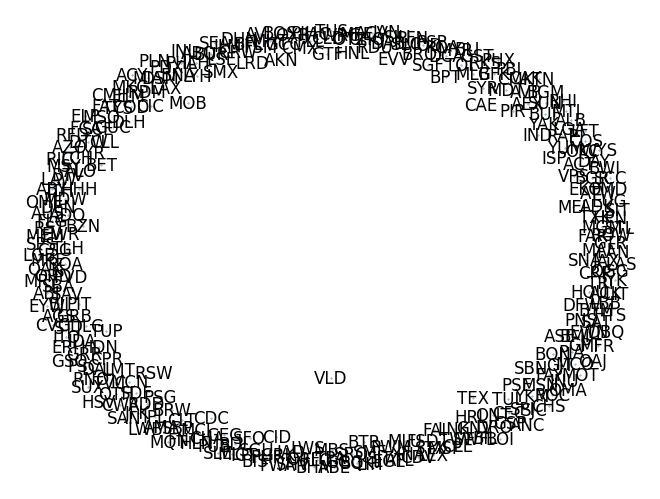

In [14]:
nx.draw(G, with_labels=True ,node_size=0.1)

Making Edges Between The Airports With Weights As Min Time 

In [15]:
for flight in my_dataset.index:
    # print (my_dataset['FlightNum'][train])
    # G.add_edge(my_dataset['Origin'], my_dataset['Dest'], weight=my_dataset['ActualElapsedTime'])
    # G.add_edge(my_dataset['Origin'][train], my_dataset['Dest'][train], l=my_dataset['ActualElapsedTime'][train],flight=my_dataset['FlightNum'][train])

    if not G.has_edge(my_dataset['Origin'][flight], my_dataset['Dest'][flight]):
        G.add_edge(my_dataset['Origin'][flight], my_dataset['Dest'][flight], l=my_dataset['ActualElapsedTime'][flight],flight=my_dataset['FlightNum'][flight])
    elif G[my_dataset['Origin'][flight]][my_dataset['Dest'][flight]][0]["l"] > my_dataset['ActualElapsedTime'][flight]:
        G[my_dataset['Origin'][flight]][my_dataset['Dest'][flight]][0]["l"] = my_dataset['ActualElapsedTime'][flight]
        G[my_dataset['Origin'][flight]][my_dataset['Dest'][flight]][0]["flight"] = my_dataset['FlightNum'][flight]

    

# import networkx as nx
# G = nx.MultiDiGraph()
# G.add_edge("A", "B", weight=3)
# G.add_edge("A", "C", weight=10)
# G.edges(data=True)
# check if edge exists


# if G.has_edge("A", "B") and G["A"]["B"][0]["weight"] > 5:
#     G["A"]["B"][0]["weight"] = 5
# elif not G.has_edge("A", "B"):
#     G.add_edge("A", "B", weight=5)
    # continue
# nx.shortest_path(G, "A", "B", weight="weight")
# G.edges(data=True)

In [16]:
G.number_of_edges()

5127

In [17]:
G.number_of_nodes()

303

Graphical Representation

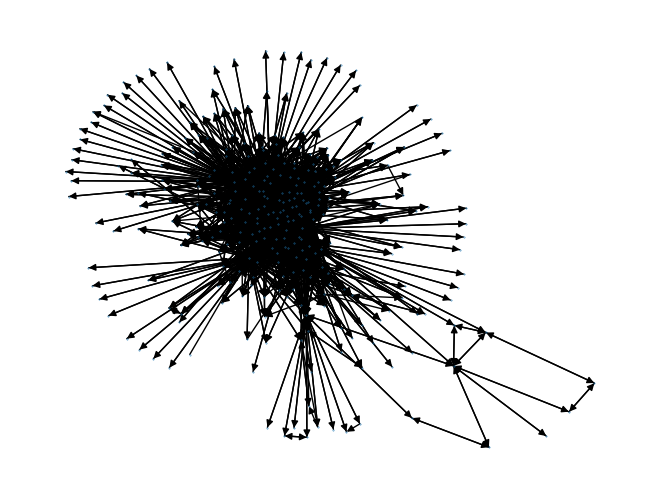

In [18]:
nx.draw(G, with_labels=False , node_size=0.1)

In [19]:
G.number_of_edges()

5127

Centrality Measures For Each Nodes

Degree Centrality (DC)

In [20]:
nx.degree_centrality(G)

{'IAD': 0.46357615894039733,
 'IND': 0.25165562913907286,
 'ISP': 0.059602649006622516,
 'JAN': 0.08609271523178808,
 'JAX': 0.24172185430463577,
 'LAS': 0.6026490066225165,
 'LAX': 0.5794701986754967,
 'LBB': 0.046357615894039736,
 'LIT': 0.12582781456953643,
 'MAF': 0.046357615894039736,
 'MCI': 0.33112582781456956,
 'MCO': 0.5728476821192053,
 'MDW': 0.3576158940397351,
 'MHT': 0.11589403973509933,
 'MSY': 0.25165562913907286,
 'OAK': 0.2185430463576159,
 'OKC': 0.19205298013245034,
 'OMA': 0.1490066225165563,
 'ONT': 0.2119205298013245,
 'ORF': 0.16887417218543047,
 'PBI': 0.17218543046357615,
 'PDX': 0.2913907284768212,
 'PHL': 0.3609271523178808,
 'PHX': 0.5827814569536424,
 'PIT': 0.2152317880794702,
 'PVD': 0.1390728476821192,
 'RDU': 0.2847682119205298,
 'RNO': 0.1456953642384106,
 'RSW': 0.2251655629139073,
 'SAN': 0.3576158940397351,
 'SAT': 0.26490066225165565,
 'SDF': 0.17549668874172186,
 'SEA': 0.3708609271523179,
 'SFO': 0.45695364238410596,
 'SJC': 0.17880794701986755,

Betweenness Centrality

In [21]:
nx.betweenness_centrality(G)

{'IAD': 0.007680654568982239,
 'IND': 0.0003085359118466668,
 'ISP': 5.555426549924097e-06,
 'JAN': 2.881011705547629e-05,
 'JAX': 0.0020321268553568006,
 'LAS': 0.019537015075536564,
 'LAX': 0.049146845720279705,
 'LBB': 1.7854684998319235e-05,
 'LIT': 0.00023019562556920268,
 'MAF': 1.9274150555342362e-05,
 'MCI': 0.0016558674789041831,
 'MCO': 0.01722096508004739,
 'MDW': 0.0020646092964665,
 'MHT': 4.4975481651965276e-06,
 'MSY': 0.0004072173664379433,
 'OAK': 0.0008789221549147521,
 'OKC': 0.00047391445145363834,
 'OMA': 7.883528234858645e-05,
 'ONT': 0.000819248212453689,
 'ORF': 8.653421178093534e-05,
 'PBI': 0.0004386297184761112,
 'PDX': 0.009269100758762128,
 'PHL': 0.0018235830057586847,
 'PHX': 0.03218260530083237,
 'PIT': 0.0012368360590479638,
 'PVD': 5.382002534697149e-06,
 'RDU': 0.0002836347710951115,
 'RNO': 0.00023730264537535635,
 'RSW': 0.0005862649312632658,
 'SAN': 0.0035161226889430168,
 'SAT': 0.001831861225346152,
 'SDF': 0.00011146766228121009,
 'SEA': 0.0384

Top 10 Airports With Highest Degree

In [22]:
l=list(G.degree(list(G.nodes())))
l.sort(key=lambda x: x[1], reverse=True)

In [23]:

l[:10] #top 10 nodes with highest degree (stations with most number of flights)

[('ATL', 345),
 ('ORD', 295),
 ('DFW', 268),
 ('MSP', 251),
 ('DEN', 242),
 ('DTW', 235),
 ('IAH', 226),
 ('CVG', 222),
 ('SLC', 220),
 ('LAS', 182)]

Fligh

In [24]:
G.edges('JAN')

OutMultiEdgeDataView([('JAN', 'BWI'), ('JAN', 'HOU'), ('JAN', 'MCO'), ('JAN', 'MDW'), ('JAN', 'EWR'), ('JAN', 'IAH'), ('JAN', 'CVG'), ('JAN', 'ATL'), ('JAN', 'DCA'), ('JAN', 'DFW'), ('JAN', 'ORD'), ('JAN', 'DTW'), ('JAN', 'MEM')])

In [25]:
G.degree('JAN')

26

In [26]:
for i in uniqueValues:
    print(i)

IAD
IND
ISP
JAN
JAX
LAS
LAX
LBB
LIT
MAF
MCI
MCO
MDW
MHT
MSY
OAK
OKC
OMA
ONT
ORF
PBI
PDX
PHL
PHX
PIT
PVD
RDU
RNO
RSW
SAN
SAT
SDF
SEA
SFO
SJC
SLC
SMF
SNA
STL
TPA
TUL
TUS
ABQ
ALB
AMA
AUS
BDL
BHM
BNA
BOI
BUF
BUR
BWI
CLE
CMH
CRP
DAL
DEN
DTW
ELP
FLL
GEG
HOU
HRL
ROC
ORD
EWR
SYR
IAH
CRW
FAT
COS
MRY
LGB
BFL
EUG
ICT
MEM
BTV
MKE
LFT
BRO
PWM
MSP
SRQ
CLT
CVG
GSO
SHV
DCA
TYS
GSP
RIC
DFW
BGR
DAY
GRR
CHS
CAE
TLH
XNA
GPT
VPS
LGA
ATL
MSN
SAV
BTR
LEX
LRD
MOB
MTJ
GRK
AEX
PNS
ABE
HSV
CHA
MFE
MLU
DSM
MGM
AVL
LCH
BOS
MYR
CLL
DAB
ASE
ATW
BMI
CAK
CID
CPR
EGE
FLG
FSD
FWA
GJT
GRB
HNL
KOA
LAN
LIH
MBS
MDT
MFR
OGG
PSP
RAP
ROA
SBA
SBN
SPI
TEX
YUM
AVP
CWA
DRO
ILM
ITO
JFK
TVC
HDN
SBP
CLD
HPN
MIA
SGF
TRI
SUN
SGU
SLE
MSO
BZN
YKM
GTF
BIL
JAC
MOD
FAR
GUC
AZO
PIA
MLI
LNK
FCA
IDA
BIS
PSC
COD
TWF
RDM
HLN
RDD
PIH
EKO
LWS
SMX
ACV
OXR
CEC
CIC
PMD
RFD
BTM
IYK
IPL
BLI
CDC
SJU
STT
ANC
STX
MLB
PHF
PFN
FAY
AGS
GNV
ABY
DHN
EVV
FNT
OAJ
TOL
SWF
EWN
MEI
GTR
LYH
HHH
EYW
VLD
CSG
ACY
FSM
MCN
CHO
FLO
BQK
SCE
TUP
TYR
LAW
SPS
ABI
GGG
ACT
SJT


Airport With Their Degrees

In [27]:
dict={}
for i in uniqueValues:
    dict[i]=G.degree(i)
dict

{'IAD': 140,
 'IND': 76,
 'ISP': 18,
 'JAN': 26,
 'JAX': 73,
 'LAS': 182,
 'LAX': 175,
 'LBB': 14,
 'LIT': 38,
 'MAF': 14,
 'MCI': 100,
 'MCO': 173,
 'MDW': 108,
 'MHT': 35,
 'MSY': 76,
 'OAK': 66,
 'OKC': 58,
 'OMA': 45,
 'ONT': 64,
 'ORF': 51,
 'PBI': 52,
 'PDX': 88,
 'PHL': 109,
 'PHX': 176,
 'PIT': 65,
 'PVD': 42,
 'RDU': 86,
 'RNO': 44,
 'RSW': 68,
 'SAN': 108,
 'SAT': 80,
 'SDF': 53,
 'SEA': 112,
 'SFO': 138,
 'SJC': 54,
 'SLC': 220,
 'SMF': 72,
 'SNA': 51,
 'STL': 100,
 'TPA': 125,
 'TUL': 53,
 'TUS': 60,
 'ABQ': 78,
 'ALB': 35,
 'AMA': 13,
 'AUS': 101,
 'BDL': 67,
 'BHM': 62,
 'BNA': 93,
 'BOI': 33,
 'BUF': 44,
 'BUR': 27,
 'BWI': 127,
 'CLE': 149,
 'CMH': 67,
 'CRP': 8,
 'DAL': 36,
 'DEN': 242,
 'DTW': 235,
 'ELP': 36,
 'FLL': 114,
 'GEG': 34,
 'HOU': 65,
 'HRL': 10,
 'ROC': 32,
 'ORD': 295,
 'EWR': 181,
 'SYR': 28,
 'IAH': 226,
 'CRW': 11,
 'FAT': 22,
 'COS': 38,
 'MRY': 19,
 'LGB': 39,
 'BFL': 17,
 'EUG': 14,
 'ICT': 24,
 'MEM': 158,
 'BTV': 23,
 'MKE': 97,
 'LFT': 6,
 'BRO'

In [28]:
df =pd.DataFrame(nx.adjacency_matrix(G, weight="l").todense(), index=G.nodes(), columns=G.nodes())
df

,IAD,IND,ISP,JAN,JAX,LAS,LAX,LBB,LIT,MAF,...,WYS,BJI,INL,GST,PUB,OTH,LMT,ITH,HTS,PIR
IAD,0.0,0.0,0.0,0.0,97.0,269.0,284.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IND,0.0,0.0,0.0,0.0,90.0,212.0,245.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ISP,0.0,0.0,0.0,0.0,0.0,298.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JAX,88.0,104.0,0.0,0.0,0.0,258.0,324.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,213.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OTH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ITH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HTS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Saving Shorted Distance Matrix

In [29]:
import pickle
dbfile = open('df', 'ab')
pickle.dump(df, dbfile)                     
dbfile.close()

# dbfile = open('examplePickle', 'rb')     
# G = pickle.load(dbfile)
# dbfile.close()

In [30]:
dbfile = open('df', 'rb')     
df2 = pickle.load(dbfile)
dbfile.close()

In [31]:
df2

,IAD,IND,ISP,JAN,JAX,LAS,LAX,LBB,LIT,MAF,...,WYS,BJI,INL,GST,PUB,OTH,LMT,ITH,HTS,PIR
IAD,0.0,0.0,0.0,0.0,97.0,269.0,284.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IND,0.0,0.0,0.0,0.0,90.0,212.0,245.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ISP,0.0,0.0,0.0,0.0,0.0,298.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JAX,88.0,104.0,0.0,0.0,0.0,258.0,324.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,213.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OTH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LMT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ITH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HTS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
o=nx.shortest_path_length(G, source="IAD", target="IND", weight="l")
o

111.0

In [33]:
shortestPathByDistanceTimeDF =pd.DataFrame( index=G.nodes(), columns=G.nodes())
for i in G.nodes():
    for j in G.nodes():
        if i==j:
            continue
        lst=[]
        # try:
        #     lst.append(nx.shortest_path_length(G, source=i, target=j, weight="distance"))
        # except nx.NetworkXNoPath:
        #     lst.append(None)
        try:
            lst.append(nx.shortest_path_length(G, source=i, target=j, weight="l"))
        except nx.NetworkXNoPath:
            lst.append(None)
        
        shortestPathByDistanceTimeDF.loc[i,j] = lst

SHORTEST PATH DISTANCE

In [34]:
shortestPathByDistanceTimeDF

,IAD,IND,ISP,JAN,JAX,LAS,LAX,LBB,LIT,MAF,...,WYS,BJI,INL,GST,PUB,OTH,LMT,ITH,HTS,PIR
IAD,NaN,[111.0],[113.0],[128.0],[97.0],[260.0],[236.0],[202.0],[155.0],[205.0],...,[307.0],[190.0],[198.0],[437.0],[None],[322.0],[332.0],[141.0],[110.0],[227.0]
IND,[98.0],NaN,[118.0],[114.0],[90.0],[212.0],[207.0],[161.0],[107.0],[164.0],...,[255.0],[140.0],[148.0],[411.0],[None],[295.0],[305.0],[121.0],[62.0],[177.0]
ISP,[129.0],[136.0],NaN,[169.0],[146.0],[298.0],[301.0],[259.0],[178.0],[262.0],...,[358.0],[233.0],[241.0],[492.0],[None],[376.0],[386.0],[184.0],[166.0],[270.0]
JAN,[139.0],[114.0],[153.0],NaN,[106.0],[187.0],[163.0],[121.0],[83.0],[124.0],...,[273.0],[178.0],[186.0],[429.0],[None],[293.0],[277.0],[180.0],[126.0],[215.0]
JAX,[88.0],[104.0],[132.0],[94.0],NaN,[227.0],[203.0],[184.0],[122.0],[186.0],...,[324.0],[198.0],[206.0],[469.0],[None],[333.0],[317.0],[183.0],[118.0],[213.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OTH,[305.0],[273.0],[343.0],[293.0],[296.0],[144.0],[149.0],[224.0],[267.0],[229.0],...,[192.0],[260.0],[268.0],[234.0],[None],NaN,[96.0],[337.0],[303.0],[297.0]
LMT,[309.0],[277.0],[347.0],[297.0],[300.0],[144.0],[137.0],[228.0],[271.0],[233.0],...,[196.0],[264.0],[272.0],[238.0],[None],[90.0],NaN,[341.0],[307.0],[301.0]
ITH,[138.0],[128.0],[189.0],[189.0],[191.0],[305.0],[311.0],[258.0],[184.0],[261.0],...,[344.0],[214.0],[222.0],[483.0],[None],[369.0],[379.0],NaN,[158.0],[251.0]
HTS,[98.0],[63.0],[118.0],[120.0],[111.0],[250.0],[239.0],[187.0],[107.0],[190.0],...,[290.0],[142.0],[150.0],[431.0],[None],[317.0],[327.0],[138.0],NaN,[179.0]


SHORTEST PATH

In [35]:
p=nx.shortest_path(G, source="LMT", target='PIR', weight="l")
p

['LMT', 'PDX', 'MSP', 'PIR']

In [36]:
import pickle
with open('graph.pkl', 'wb') as m:
    pickle.dump(G, m)

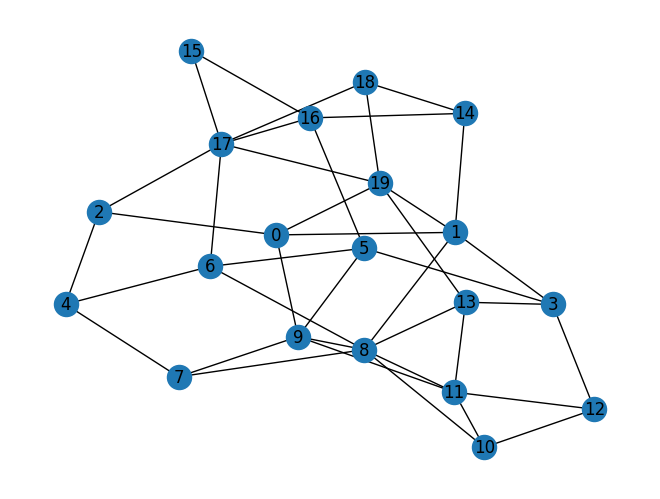

In [37]:
n = 20
k = 4
p = 0.3
seed = 42

G8 = nx.watts_strogatz_graph(n, k, p, seed=seed)

# Draw the graph using the default layout
nx.draw(G8, with_labels=True)

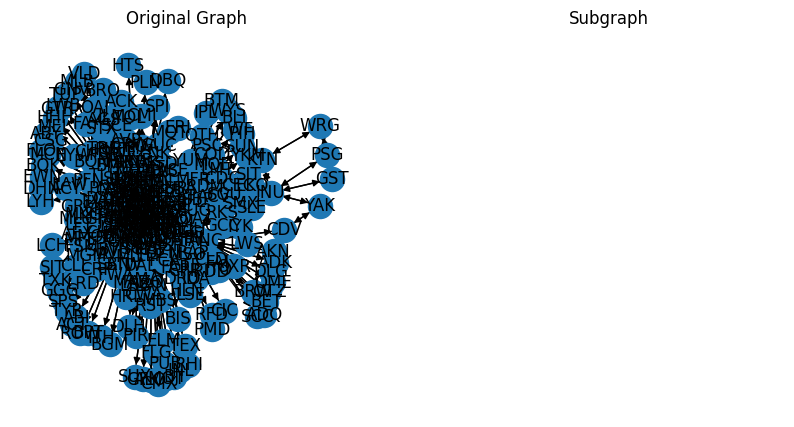

In [38]:
nodes = [1, 2, 3, 4, 5]
# Create a subgraph from the selected nodes
subgraph = G.subgraph(nodes)

# Draw the original graph and the subgraph side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

nx.draw(G, ax=ax1, with_labels=True)
ax1.set_title('Original Graph')

nx.draw(subgraph, ax=ax2, with_labels=True)
ax2.set_title('Subgraph')

plt.show()

In [39]:
import networkx as nx
G_simple = nx.Graph(G)

# Find the cycle basis of the graph
cycle_basis = nx.cycle_basis(G_simple, root="ATL")

# Print the cycle basis
print(len(cycle_basis))

2332


In [40]:
G0 = nx.Graph(G)
efficiency = nx.efficiency(G0, "ATL", "YUM")

# Print the efficiency
print(efficiency)

0.5


In [41]:
#CSV To Dataframe
import pandas as pd
station_code = pd.read_csv('US-Airport-Codes.csv',  low_memory=False) 
station_code

,Airport,Code,State,State Name,Code.1
0,Birmingham International Airport,BHM,Alabama,Alabama,AL
1,Dothan Regional Airport,DHM,Alabama,Alaska,AK
2,Huntsville International Airport,HSV,Alabama,Arizona,AZ
3,Mobile,MOB,Alabama,Arkansas,AR
4,Montgomery,MGM,Alabama,California,CA
...,...,...,...,...,...
181,Milwaukee,MKE,Wisconsin,NaN,NaN
182,Casper,CPR,Wyoming,NaN,NaN
183,Cheyenne,CYS,Wyoming,NaN,NaN
184,Jackson Hole,JAC,Wyoming,NaN,NaN


In [42]:
import csv
airport_name={}
with open ('US-Airport-Codes.csv', mode='r') as f:
    data = csv.reader(f)
    airport_name={rows[1].strip():rows[0].strip() for rows in data}
print(type(airport_name)) 

<class 'dict'>


In [43]:
print(airport_name)

{'Code': 'Airport', 'BHM': 'Birmingham International Airport', 'DHM': 'Dothan Regional Airport', 'HSV': 'Huntsville International Airport', 'MOB': 'Mobile', 'MGM': 'Montgomery', 'ANC': 'Anchorage International Airport', 'FAI': 'Fairbanks International Airport', 'JNU': 'Juneau International Airport', 'FLG': 'Flagstaff', 'PHX': 'Phoenix, Phoenix Sky Harbor International Airport', 'TUS': 'Tucson International Airport', 'YUM': 'Yuma International Airport', 'FYV': 'Fayetteville', 'LIT': 'Little Rock National Airport', 'BUR': 'Burbank', 'FAT': 'Fresno', 'LGB': 'Long Beach', 'LAX': 'Los Angeles International Airport', 'OAK': 'Oakland', 'ONT': 'Ontario', 'PSP': 'Palm Springs', 'SMF': 'Sacramento', 'SAN': 'San Diego', 'SFO': 'San Francisco International Airport', 'SJC': 'San Jose', 'SNA': 'Santa Ana', 'ASE': 'Aspen', 'COS': 'Colorado Springs', 'DEN': 'Denver International Airport', 'GJT': 'Grand Junction', 'PUB': 'Pueblo', 'BDL': 'Hartford', 'IAD': 'Dulles', 'DCA': 'Washington National Airport'

In [44]:
import pickle
with open('airport_code.pkl', 'wb') as f:
    pickle.dump(airport_name, f)

In [45]:
print(airport_name['ATL '])

KeyError: 'ATL '

In [46]:
option1='Atlanta Hartsfield International Airport'
option2='Indianapolis International Airport'
# p = nx.shortest_path(G,source=[i for i in airport_name if airport_name[i]==option1][0],target=[i for i in airport_name if airport_name[i]==option2][0], weight="l")
p=nx.shortest_path(G,source='ATL',target='IND',weight="l")
print(p)
source=[i for i in airport_name if airport_name[i]=="Atlanta Hartsfield International Airport "]
target=[i for i in airport_name if airport_name[i]=="Indianapolis International Airport "]
print(source)
print(target)

['ATL', 'IND']
[]
[]


In [47]:
#Remove Spaces from Airport Codes
# for i in airport_name:
    
#     airport_name[i]=airport_name[i].strip()
# print(airport_name)
#Remove Spaces from Airport Codes
# for i in airport_name:
#     #Remove Spaces from Airport Codes keys
#     airport_name[i.strip()]=airport_name[i]
# print(airport_name)
print(airport_name['ATL '])
for i in airport_name:
    #Remove Spaces from Airport Codes keys
    airport_name[i.strip()]=airport_name[i]
print(airport_name)
    

KeyError: 'ATL '

In [48]:
import csv
airport_name={}
with open ('US-Airport-Codes.csv', mode='r') as f:
    data = csv.reader(f)
    state_name={rows[1].strip():rows[2].strip() for rows in data}
print(state_name) 

{'Code': 'State', 'BHM': 'Alabama', 'DHM': 'Alabama', 'HSV': 'Alabama', 'MOB': 'Alabama', 'MGM': 'Alabama', 'ANC': 'Alaska', 'FAI': 'Alaska', 'JNU': 'Alaska', 'FLG': 'Arizona', 'PHX': 'Arizona', 'TUS': 'Arizona', 'YUM': 'Arizona', 'FYV': 'Arkansas', 'LIT': 'Arkansas', 'BUR': 'California', 'FAT': 'California', 'LGB': 'California', 'LAX': 'California', 'OAK': 'California', 'ONT': 'California', 'PSP': 'California', 'SMF': 'California', 'SAN': 'California', 'SFO': 'California', 'SJC': 'California', 'SNA': 'California', 'ASE': 'Colorado', 'COS': 'Colorado', 'DEN': 'Colorado', 'GJT': 'Colorado', 'PUB': 'Colorado', 'BDL': 'Connecticut', 'IAD': 'Virginia', 'DCA': 'District of Columbia', 'DAB': 'Florida', 'FLL': 'Florida', 'RSW': 'Florida', 'JAX': 'Florida', 'MIA': 'Florida', 'MCO': 'Florida', 'PNS': 'Florida', 'PIE': 'Florida', 'SRQ': 'Florida', 'TPA': 'Florida', 'PBI': 'Florida', 'PFN': 'Florida', 'ATL': 'Georgia', 'AGS': 'Georgia', 'SAV': 'Georgia', 'ITO': 'Hawaii', 'HNL': 'Hawaii', 'OGG': '

In [49]:
import pickle
with open('state_code.pkl', 'wb') as f:
    pickle.dump(state_name, f)

In [50]:
state_name.values()

dict_values(['State', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alabama', 'Alaska', 'Alaska', 'Alaska', 'Arizona', 'Arizona', 'Arizona', 'Arizona', 'Arkansas', 'Arkansas', 'California', 'California', 'California', 'California', 'California', 'California', 'California', 'California', 'California', 'California', 'California', 'California', 'Colorado', 'Colorado', 'Colorado', 'Colorado', 'Colorado', 'Connecticut', 'Virginia', 'District of Columbia', 'Florida', 'Florida', 'Florida', 'Florida', 'Florida', 'Florida', 'Florida', 'Florida', 'Florida', 'Florida', 'Florida', 'Florida', 'Georgia', 'Georgia', 'Georgia', 'Hawaii', 'Hawaii', 'Hawaii', 'Hawaii', 'Hawaii', 'Idaho', 'Illinois', 'Illinois', 'Illinois', 'Illinois', 'Indiana', 'Indiana', 'Indiana', 'Indiana', 'Iowa', 'Iowa', 'Kansas', 'Kentucky', 'Kentucky', 'Louisiana', 'Louisiana', 'Louisiana', 'Maine', 'Maine', 'Maine', 'Maryland', 'Massachusetts', 'Massachusetts', 'Massachusetts', 'Massachusetts', 'Michigan', 'Michigan', 'Michigan'

In [51]:
#Degree Of Particular Node
G.degree('ATL')

345

In [52]:
temp={}
for z in state_name:
    if state_name[z]=='Alabama':
        temp[z]=G.degree(z)
temp

{'BHM': 62, 'DHM': DiMultiDegreeView({}), 'HSV': 29, 'MOB': 10, 'MGM': 6}

In [53]:
#Store Unique States
uniqueValues = set(state_name.values())
type(uniqueValues)
type(list(uniqueValues))

list

In [54]:
with open('graph.pkl', 'rb') as c:
    nod = pickle.load(c)

In [55]:
temp={}
for z in state_name:
    if state_name[z]=='Alabama':
        temp[z]=nod.degree(z)
temp
st.write(temp)
# Put Dictionary in Dataframe
df = pd.DataFrame.from_dict(temp, orient='index', columns=['Degree'])
# Print table
st.write(df)

NameError: name 'st' is not defined

In [56]:
import csv
airport_name={}
with open ('US-STATE.csv', mode='r') as f:
    data = csv.reader(f)
    state_name2={rows[1].strip():rows[0].strip() for rows in data}
print(state_name2) 

{'Code': 'State Name', 'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'District of Columbia', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}


In [57]:
import pickle
with open('state_name2.pkl', 'wb') as f:
    pickle.dump(state_name2, f)

In [58]:
list(state_name2.values())

['State Name',
 'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [ ]:
state_name2

{'Code': 'State Name',
 'AL': 'Alabama',
 'AK': 'Alaska',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'FL': 'Florida',
 'GA': 'Georgia',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VA': 'Virginia',
 'WA': 'Washington',
 'WV': 'West Virginia',
 'WI': 'Wisconsin',
 'WY': 'Wyo

In [59]:
import pickle
with open('nearairport.pkl', 'wb') as m:
    pickle.dump(shortestPathByDistanceTimeDF, m)

In [60]:
print(type(shortestPathByDistanceTimeDF))

<class 'pandas.core.frame.DataFrame'>


In [62]:
shortestPathByDistanceTimeDF

,IAD,IND,ISP,JAN,JAX,LAS,LAX,LBB,LIT,MAF,...,WYS,BJI,INL,GST,PUB,OTH,LMT,ITH,HTS,PIR
IAD,NaN,[111.0],[113.0],[128.0],[97.0],[260.0],[236.0],[202.0],[155.0],[205.0],...,[307.0],[190.0],[198.0],[437.0],[None],[322.0],[332.0],[141.0],[110.0],[227.0]
IND,[98.0],NaN,[118.0],[114.0],[90.0],[212.0],[207.0],[161.0],[107.0],[164.0],...,[255.0],[140.0],[148.0],[411.0],[None],[295.0],[305.0],[121.0],[62.0],[177.0]
ISP,[129.0],[136.0],NaN,[169.0],[146.0],[298.0],[301.0],[259.0],[178.0],[262.0],...,[358.0],[233.0],[241.0],[492.0],[None],[376.0],[386.0],[184.0],[166.0],[270.0]
JAN,[139.0],[114.0],[153.0],NaN,[106.0],[187.0],[163.0],[121.0],[83.0],[124.0],...,[273.0],[178.0],[186.0],[429.0],[None],[293.0],[277.0],[180.0],[126.0],[215.0]
JAX,[88.0],[104.0],[132.0],[94.0],NaN,[227.0],[203.0],[184.0],[122.0],[186.0],...,[324.0],[198.0],[206.0],[469.0],[None],[333.0],[317.0],[183.0],[118.0],[213.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OTH,[305.0],[273.0],[343.0],[293.0],[296.0],[144.0],[149.0],[224.0],[267.0],[229.0],...,[192.0],[260.0],[268.0],[234.0],[None],NaN,[96.0],[337.0],[303.0],[297.0]
LMT,[309.0],[277.0],[347.0],[297.0],[300.0],[144.0],[137.0],[228.0],[271.0],[233.0],...,[196.0],[264.0],[272.0],[238.0],[None],[90.0],NaN,[341.0],[307.0],[301.0]
ITH,[138.0],[128.0],[189.0],[189.0],[191.0],[305.0],[311.0],[258.0],[184.0],[261.0],...,[344.0],[214.0],[222.0],[483.0],[None],[369.0],[379.0],NaN,[158.0],[251.0]
HTS,[98.0],[63.0],[118.0],[120.0],[111.0],[250.0],[239.0],[187.0],[107.0],[190.0],...,[290.0],[142.0],[150.0],[431.0],[None],[317.0],[327.0],[138.0],NaN,[179.0]


In [93]:
#Find top 10 airports near to one airport using shortestPathByDistanceTimeDF
n=shortestPathByDistanceTimeDF['ATL'].sort_values().head(100)
n
#convert n to dictionary
n=n.to_dict()
n
# type(n)
# #dict to table
# df = pd.DataFrame.from_dict(n, orient='index', columns=['Distance'])
#convert all float values in dict to int
#empty dictionary
blank={}
for i in n:
    blank[i]=int(n[i][0])
#list to int 


# type(k)
# b=k[0]
# type(b)
# b=int(b)
# type(b)
blank
df = pd.DataFrame.from_dict(blank, orient='index', columns=['Distance'])
df
# convert all float values in dict to int


,Distance
GNV,27
MCN,30
CHA,30
CSG,31
MGM,32
...,...
BWI,89
PIA,89
HOU,89
MIA,90
